# CAPÍTULO 4

## EXERCÍCIO 1

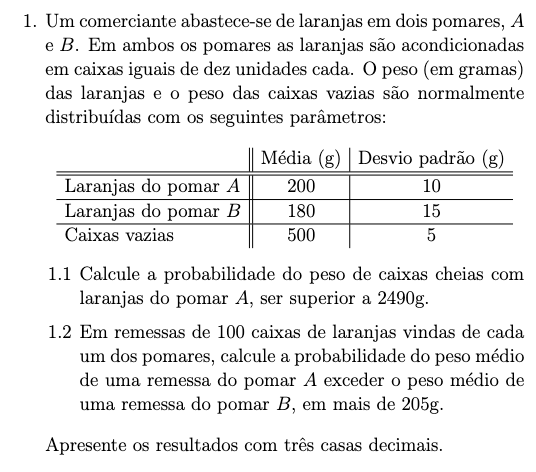

In [13]:
from scipy import stats
import numpy as     np


# 1.1) 
# XA v.a. XA = peso de uma laranjas do pomar A, em gramas
# XB v.a. XB = peso de uma laranjas do pomar B, em gramas
# XC v.a. XC = peso de uma caixa vazia, em gramas

# Y v.a. YA = Peso em gramas de uma caixa cheia com 10 laranjas do pomar A, em gramas

# P(YA > 2490)
# YA ~ N(10*200+10*10^2+5^2) = N(2500, 1025)

muA = 2500
sigmaA = np.sqrt(1025)
ya = 1 - stats.norm.cdf(2490, muA, sigmaA)
print(f'1.1) A probabilidade do peso de uma caixa ser cheia com 10 larajas do pomar A é: {ya:.3f}.')


# 1.2)

# YBbarra = peso médio de 100 caixas de 10 laranajas do pomar B, em gramas
# YBbarra ~ N(2300, 47.7^2)
# P(YBbarra > 205)
# P(YAbarra > YBbarra) = P(YAbarra - YBbarra > 0)
# YAbarra - YBbarra ~ N(200 - 2300, 125 + 47.7^2) = N(-2100, 125 + 2275.29)
# P(YAbarra - YBbarra > 0) = P(Z > (0 - (-2100)) / sqrt(125 + 2275.29))

# P(YAbarra - YBbarra > 205)
# P(Z > (2300 - (-2100))
# P(Z > (2300 - (-2100)) / sqrt(125 + 2275.29))

mu_diff = 200
sigma_diff = np.sqrt(33)
p2 = 1 - stats.norm.cdf(205, mu_diff, sigma_diff)
print(f'1.2: A probabilidade do peso médio em 100 caixas cheias com 10 laranjas do pomar A é: {p2:.3f}.')

1.1) A probabilidade do peso de uma caixa ser cheia com 10 larajas do pomar A é: 0.623.
1.2: A probabilidade do peso médio em 100 caixas cheias com 10 laranjas do pomar A é: 0.192.


## EXERCÍCIO 2

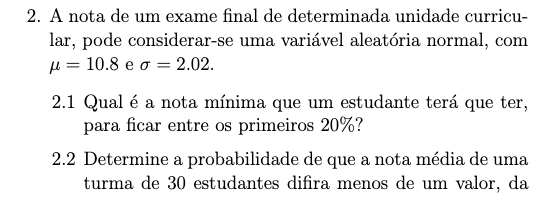

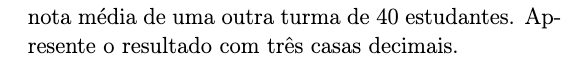

In [19]:
from scipy import stats
import numpy as np

# X v.a. X = Nota final do exame
# X ~ N(mu, sigma²)
# X ~ N(10.8, 2.02²)
# mu = 10.8
# sigma = 2.02


mu = 10.8      
sigma = 2.02   

# 2.1)
# Nota mínima para top 20% (Percentil 80%)
# P(X > nmímima) = 0.20

x_min = stats.norm.ppf(0.80, 10.8, 2.02) 
print(f'2.1 Nota mínima para top 20%: {x_min:.1f} valores.')


# 2.2)
# Probabilidade de |X̄30 - X̄40| < 1
# X̄30: Média das notas de uma turma com 30 estudantes
# X̄40: Média das notas de uma turma com 40 estudantes
# D = X̄30 - X̄40: Diferença entre as médias das turmas

n1, n2 = 30, 40

# X̄30 ~ N(mu, σ²/n1) = N(10.8, 2.02²/30)
# X̄40 ~ N(mu, σ²/n2) = N(10.8, 2.02²/40)
var_X30 = (sigma**2) / n1
var_X40 = (sigma**2) / n2

# Diferença D = X̄30 - X̄40 ~ N(0, var_X30 + var_X40)
var_D = var_X30 + var_X40
std_D = np.sqrt(var_D)

# P(|D| < delta) = P(1 < D < 1)
prob = stats.norm.cdf(1, 0, std_D) - stats.norm.cdf(-1, 0, std_D)
print(f'2.2 P(|Diferença| < 1): {prob:.3f}')

2.1 Nota mínima para top 20%: 12.5 valores.
2.2 P(|Diferença| < 1): 0.960


## EXERCÍCIO 9

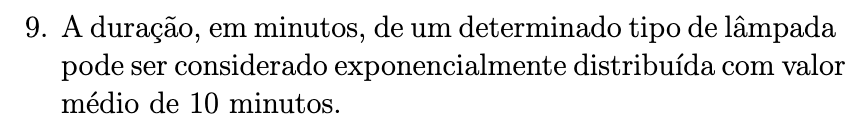
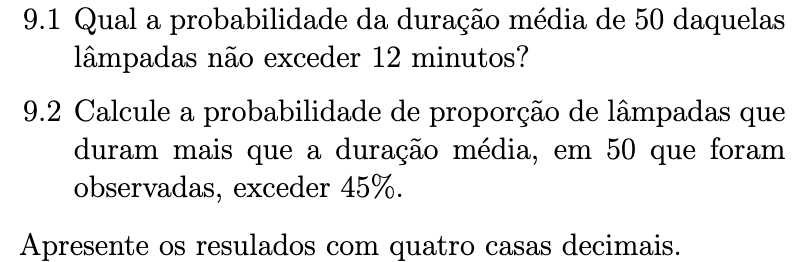

In [ ]:
from scipy import stats
import numpy as np

# X ~ Exp(λ=0.1) = Duração individual de uma lâmpada (média=10min)
# X̄50 = tempo médio da duração de 50 lâmpadas
# P̂ = Proporção amostral de lâmpadas que duram >10min em n=50


n = 50     
beta = 10       
# 9.1 - P(X̄50 ≤ 12)

# Pela CLT = X̄50 ~ N(μ=10, σ²=100/50=2)
# Var(X)=1/λ²=100

std_Xbar = np.sqrt(100 / n)

prob_9_1 = stats.norm.cdf(12, loc=beta, scale=std_Xbar)
print(f'9.1) A probabilidade da duração média de 50 lâmpadas não exceder os 12 minutos é: {prob_9_1:.4f}.')


# 9.2 - P(P̂ > 0.45)

# P(X > 10) = e^(-λ*10) ≈ 0.3679 (constante para cada lâmpada)

lambda_exp = 1/10
p = np.exp(-lambda_exp * 10)

# Pela CLT: P̂ ~ N(p=0.3679, p(1-p)/n ≈ 0.0047)
mu_Phat = p
std_Phat = np.sqrt(p * (1 - p) / n)

prob_9_2 = 1 - stats.norm.cdf(0.45, loc=mu_Phat, scale=std_Phat)
print(f'9.2) A probabilidade de 45%, de 50 lâmpadas durarem mais que proporção média de duração é: {prob_9_2:.4f}.')



9.1) A probabilidade da duração média de 50 lâmpadas não exceder os 12 minutos é: 0.9214.
9.2) A probabilidade de 45%, de 50 lâmpadas durarem mais que proporção média de duração é: 0.1143.


## EXERCÍCIO 10

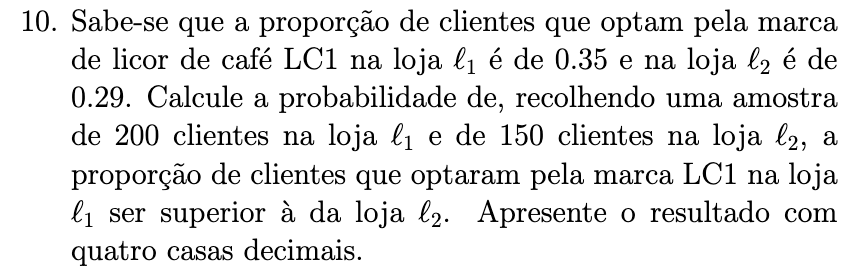

In [11]:
from scipy import stats
import numpy as np


# P̂1: Proporção de clientes que escolhem a loja l1 (n1=200)
# P̂2: Proporção de clientes que escolhem a loja l2 (n2=150)
# D = P̂1 - P̂2: Diferença entre proporções amostrais


p1 = 0.35
p2 = 0.29
n1 = 200 
n2 = 150

# Cálculo de P(P̂1 > P̂2) = P(D > 0)

# P̂1 ~ N(p1, p1(1-p1)/n1) = N(0.35, 0.0011375)
# P̂2 ~ N(p2, p2(1-p2)/n2) = N(0.29, 0.0013733)
# D ~ N(p1-p2, p1(1-p1)/n1 + p2(1-p2)/n2)

mu_D = p1 - p2  
var_D = (p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2) 
std_D = np.sqrt(var_D)  

# P(D > 0) = 1 - P(D ≤ 0)
prob = 1 - stats.norm.cdf(0, loc=mu_D, scale=std_D)
print(f'10) A proporção de clientes que preferiu a loja l1 em vez da loja 2 é: {prob:.4f}.')


10) A proporção de clientes que preferiu a loja l1 em vez da loja 2 é: 0.8845.


## EXERCÍCIO 12

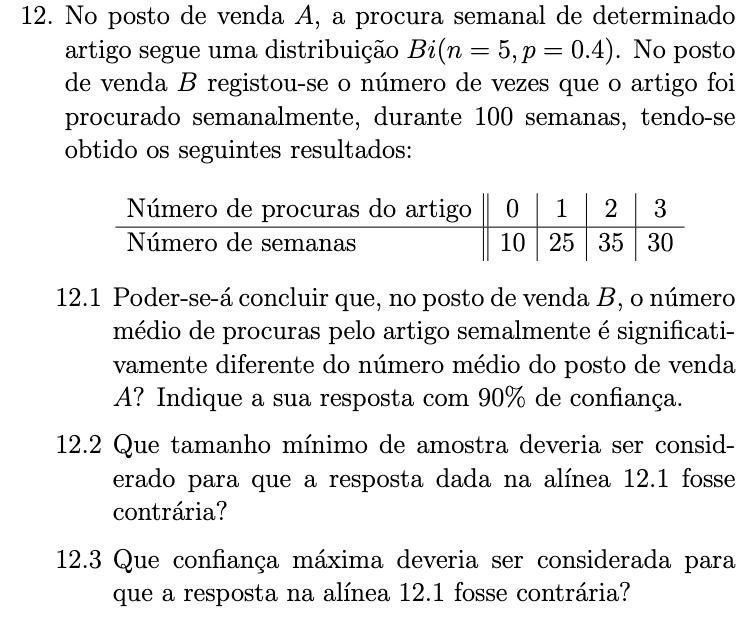

In [3]:
import numpy as np
from scipy import stats

## Ex 12

# 12.1
n = 100
media_B = (0 * 10 + 1 * 25 + 2 * 35 + 3 * 30) / n
variância_B = (10 * (0 - media_B)**2 + 25 * (1 - media_B)**2 + 35 * (2 - media_B)**2 + 30 * (3 - media_B)**2) / (n -1)
desvio_B = np.sqrt(variância_B)
# Aproximação alnormal
alfa = 1 - 0.90
valor_alfa = 1 - alfa / 2
valor_z = stats.norm.ppf(valor_alfa, 0, 1)
epson = valor_z * (desvio_B / np. sqrt (n))
lim_inf_IC = media_B - epson
lim_sup_IC = media_B + epson
print(f'O IC para média de B a 90% é [{lim_inf_IC:.3f},{lim_sup_IC:.3f}].')
      
# 12.2
aux = (valor_z * desvio_B) / (2 - media_B)
print(f'Tamanho mínimo da amostra é {np.ceil(aux**2): .0f}.')

# 12.3
aux = ((2 - media_B) * np.sqrt(n)) / desvio_B
valor = stats.norm.cdf(aux, 0, 1) - stats.norm.cdf(-aux, 0, 1)
print(f'Confiança máxima é {(valor * 100): .2f}%.')

# texto a escrever neste tipo de exercício
# como 2 pertence ao intervalo de confiança, podemos afirmar, com uma confiança de 90%, que o nº médio de procuras de artigos no posto B não é significativamente diferente do nº médio de procuras no posto A

O IC para média de B a 90% é [1.691,2.009].
Tamanho mínimo da amostra é  113.
Confiança máxima é  87.88%.


## EXERCÍCIO 19

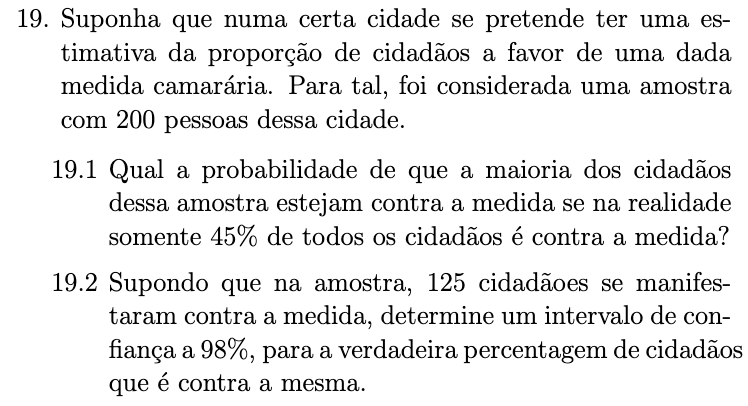

In [1]:
from scipy import stats
import numpy as np


# VARIÁVEIS ALEATÓRIAS:
# X ~ Binomial(n=200, p=0.45): Número de cidadãos contra na amostra
# P̂ = X/200: Proporção amostral de cidadãos contra


n = 200               # Tamanho da amostra
p_real = 0.45         # Proporção real de cidadãos contra


# 19.1 - Probabilidade de maioria contra (P̂ > 0.5)

# Aproximação normal: P̂ ~ N(p=0.45, p(1-p)/n ≈ 0.0012375)
mu = p_real
std = np.sqrt(p_real * (1 - p_real) / n)

prob = 1 - stats.norm.cdf(0.5, loc=mu, scale=std)
print(f'19.1 P(P̂ > 0.5): {prob:.4f}')


# 19.2 - IC 98% para proporção real (com 125 contra)

x_contra = 125
p_amostral = x_contra / n

# Método de Wald com correção de continuidade
z = stats.norm.ppf(0.99)  # Z para 98% de confiança (α=0.02)
margem = z * np.sqrt(p_amostral * (1 - p_amostral) / n)

IC_inferior = p_amostral - margem
IC_superior = p_amostral + margem
print(f'19.2 IC 98%: [{IC_inferior:.4f}, {IC_superior:.4f}]')

19.1 P(P̂ > 0.5): 0.0776
19.2 IC 98%: [0.5454, 0.7046]


## EXERCÍCIO 13

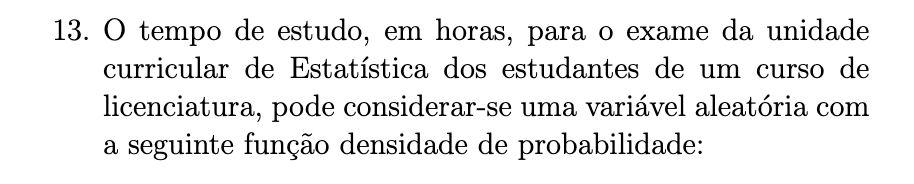

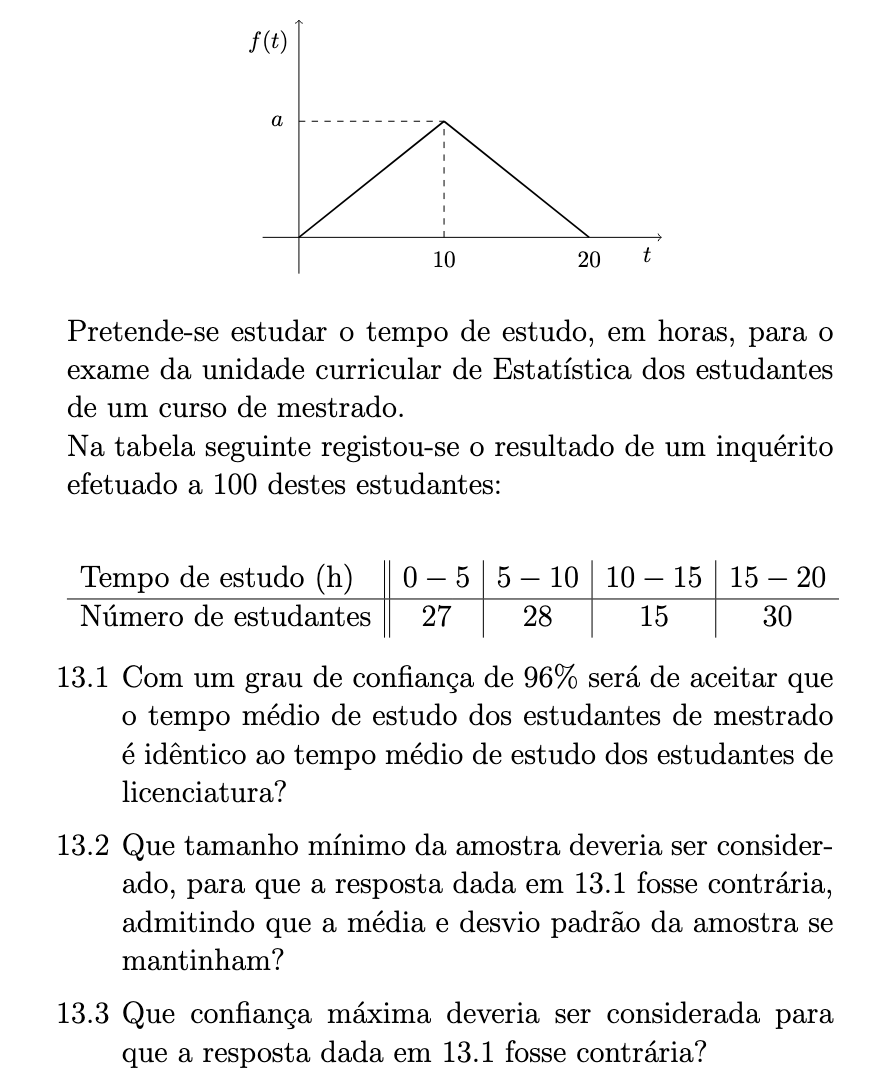

## EXERCÍCIO 5

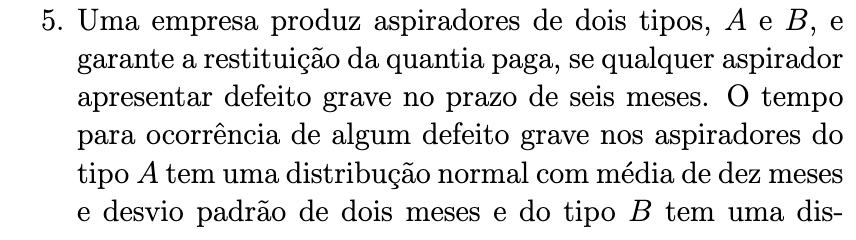

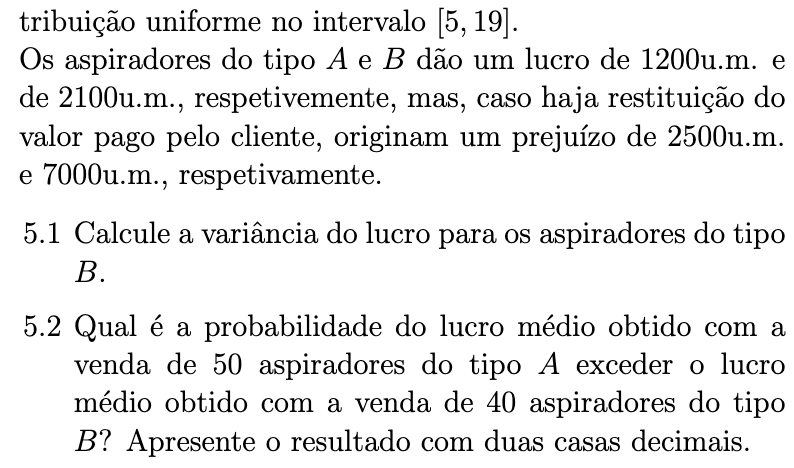

In [ ]:
import numpy as np
from scipy import stats


# XA v.a. XA = tempo para ocorrência de um defeito grave, nos aspiradoress A, em meses.
# XA ~ N (u=10, sigma²=2^2) 

# XB v.a. XB = tempo para ocorrência de um defeito grave, nos aspiradores B, em meses.
# XB ~ U (5,19)

# E(XB) = 12
# var(XB) = 4.04^2

# 5.1) Variância do lucro para aspiradores do tipo B
# LB = lucro dos aspiradores do tipo B, em u.m.
#    LB     |           -70000          |             2100
# --------------------------------------------------------------
#   f(LB)   |    P(LB=7000) = P(XB≤6)   |   P(LB=2100) = 1 - P(XB≤6)


LB = stats.uniform.cdf(6, 5, 14) # P(XB ≤ 6)
print(f'5.1) A probabilidade de lucro para aspiradores do tipo B é: {LB:.4f} e {1-LB:.4f}.')

# 5.2) Probabilidade de lucro médio com 50 aspiradores do tipo A, ser maior do que a venda com 40 aspiradores do tipo B


prob_defeito_B = (6 - 5) / (19 - 5) if 6 >= 5 else 0
prob_defeito_B = max(0, min(prob_defeito_B, 1))  

prob_defeito_A = stats.norm.cdf(6, 10, 2)

E_L_A = (1 - prob_defeito_A) * 1200 + prob_defeito_A * (-2500)
var_L_A = (1200 - (-2500))**2 * prob_defeito_A * (1 - prob_defeito_A)

E_L_B = (1 - prob_defeito_B) * 2100 + prob_defeito_B * (-7000)
E_L2_B = (1 - prob_defeito_B) * 2100**2 + prob_defeito_B * (-7000)**2
var_L_B = E_L2_B - E_L_B**2

media_diff = E_L_A - E_L_B
var_diff = var_L_A/50 + var_L_B/40

prob = 1 - stats.norm.cdf(0, media_diff, np.sqrt(var_diff))

print(f'5.2) A probabilidade de lucro médio com 50 aspiradores do tipo A, ser maior do que a venda com 40 aspiradores do tipo B é: {prob:.2f}.')


5.1) A probabilidade de lucro para aspiradores do tipo B é: 0.0714 e 0.9286.
5.2) A probabilidade de lucro médio com 50 aspiradores do tipo A, ser maior do que a venda com 40 aspiradores do tipo B é: 0.19.


## EXERCÍCIO 7

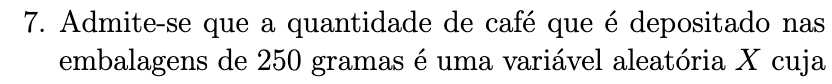

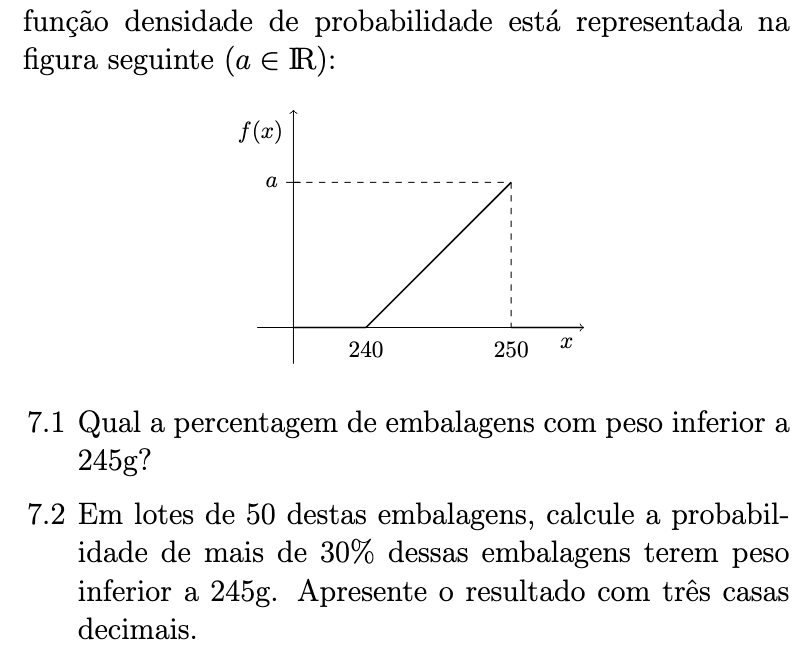

In [26]:
import numpy as np
from scipy import stats

# 7.1)
# A o valor de a é igual a Atriangulo = (250-240)*a/2 = 1= (250-240)*a/2 
# a = 0.1 (1/5)

# 250-240 / (1/5) = 245-250 / h = 
# h = 5/50 = 1/10

# P(X < 245) = (245-240)* (1/10) / 2 = 0.25
# P(X < 245) = 25%

# 7.2) 
# P^ = proporção, em 50, de embalagens terem peso inferior a 245 gramas
# p = probabilidade de uma embalagem ter peso inferior a 245 gramas

# P^ ~ N (p, p(1-p)/n)
# P^ ~ N (0.25, 0.25*(1-0.25)/50) = N(0.25, 0.25*0.75/50) = N(0.25, 0.00375)
# P(P^ < 0.25) = P(Z < (0.25 - 0.25) / sqrt(0.00375))
# P(p^ > 0.30) = 0.207

prob = 1 - stats.norm.cdf(0.30, 0.25, np.sqrt(0.00375))

print(f'7.2) A probabilidade de uma embalagem ter peso inferior a 245 gramas é: {prob:.3f}.')


7.2) A probabilidade de uma embalagem ter peso inferior a 245 gramas é: 0.207.


## EXERCÍCIO 14

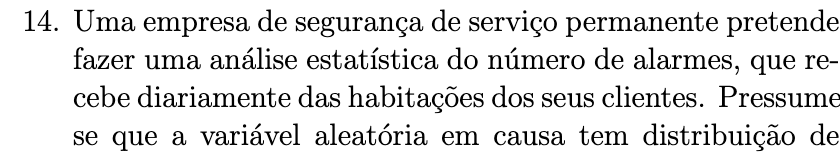

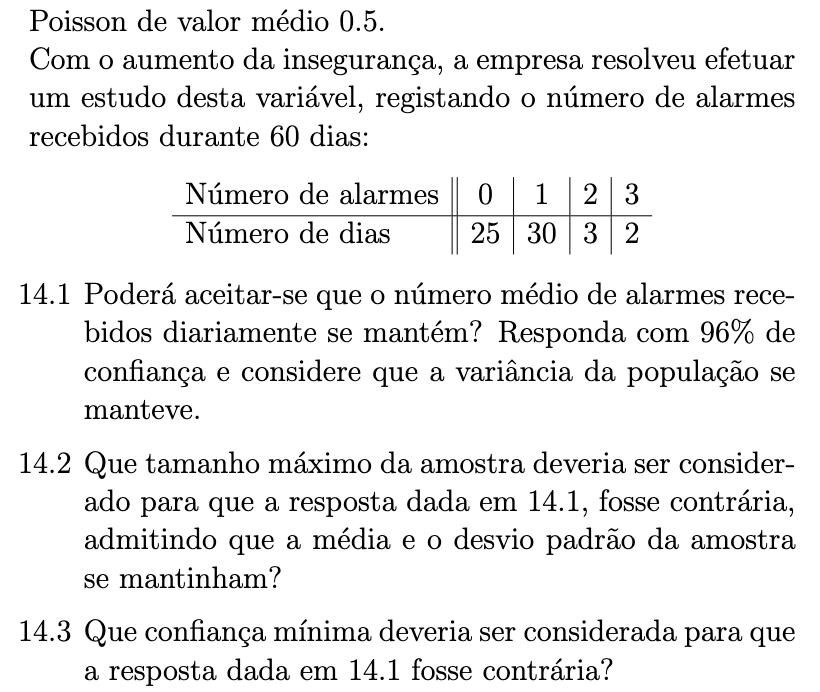

In [ ]:
import numpy as np
from scipy import stats

# X = número de alarmes por dia
# X ~ Poisson(λ=0,5)
# variancia = raiz da variancia ao quadrado
# devio padrão = sqrt(λ)

#   u  | 0  |  1  |  2  |  3 
# ----------------------------
# f(X) | 25 | 30  |  3  |  2  

# 14.1)
# IC 96% ; xbarra = ] xbarra - delta ; x + delta [ ; delta = Z (1-alfa/2) - (sigma/sqrt(n))
# grau de confiança = 96%
# nível de significância = alfa = 4%

# Z 1-0-02 = sqrt(0.5) / sqrt(60) = 
# Z 0.98 = 2.053

Z = stats.norm.ppf(0.98)

print(f'{Z}')

Z2 = Z * np.sqrt(0.5 / 60)
print(f'{Z2}')

# IC = [x - Z2, x + Z2]
# IC = [0.7 - 0.1875 ; 0.7 + 0.1875]

IC = [0.7 - Z2, 0.7 + Z2]
print(f'14.1) O intervalo de confiança é de: {IC[0]:.4f} e {IC[1]:.4f}. Logo aumentou a criminalidade na zona, visto que o valor se encontra acima de 0.5.')

# 14.2)
# delta > 0.2 
# delta = ZC (sigma/sqrt(n)) > 0.2

# sqrt(n) < ZC * sigma / 0,2
# ZC > 0.2 * sqrt(60) /0.2
# n < 52,71 logo n = 52

n = 52
print(f'14.2) O tamanho mínimo da amostra é de: {n}.')

# 14.3)
# Confiança mínima para que a 14.1 fosse contrária

# # delta > 0.2 
# delta = ZC (sigma/sqrt(n)) > 0.2

# ZC > 0.2 * sqrt(60) / sqrt(0.5)

ZC = 0.2 * np.sqrt(60) / np.sqrt(0.5)

# P(Z < ZC) - P (Z < -ZC)
p = stats.norm.cdf(ZC) - stats.norm.cdf(-ZC)
# 0.9715 = 97.15%

print(f'14.3) O valor para que 14.1 fosse contrária : {p*100:.2f}%.')

2.0537489106318225
0.18748076763411844
14.1) O intervalo de confiança é de: 0.5125 e 0.8875. Logo aumentou a criminalidade na zona, visto que o valor se encontra acima de 0.5.
14.2) O tamanho mínimo da amostra é de: 52.
14.3) O valor para que 14.1 fosse contrária : 97.15%.


## EXERCÍCIO 25

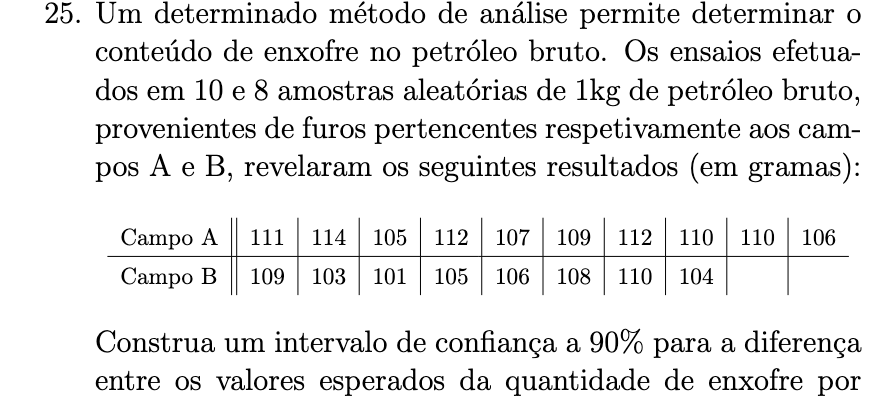

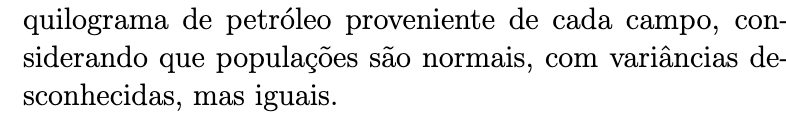

In [ ]:
import numpy as np
from scipy import stats

# XA = quantidade de enxofre por Kg no campo A
# XA ~ N(médiaA, desvioA²)
# nA = 10
# médiaXA = 109.6

# XB = quantidade de enxofre por Kg no campo B
# XB ~ N(médiaB, desvioB²)
# nB = 10
# médiaXB = 112.4

# W = XA - XB
# W ~ N(médiaA - médiaB; desvioXA² + desvioXB²)
# IC mediaW 90% = ]XbarraA - XbarraB - delta; XA + XB + delta[ ; delta = Z 15% (sigma * sqrt(1/nA + 1/nB))


# sigmaA = sqrt((nA-1* sA²) + (nB-1) * sB²) / (nA + nB - 2) quando o sigma A e B são desconhecidos
# s² = somatório (xi - xbarra)² / (n-1)
# s² = somatório (xi² - xbarra²) / (n-1)
# sA² = 8.267
# sB² = 9.643

# sigmaA = sqrt((10-1) * 8.267 + (8-1) * 9.643) / (10 + 8 - 2)
sigmaA = np.sqrt((9 * 8.267 + 7 * 9.643) / (10 + 8 - 2))
print(f'{sigmaA:.4f}')


2.9781
2.3236
IC = -5.1236 e 224.3236


## EXERCÍCIO 29

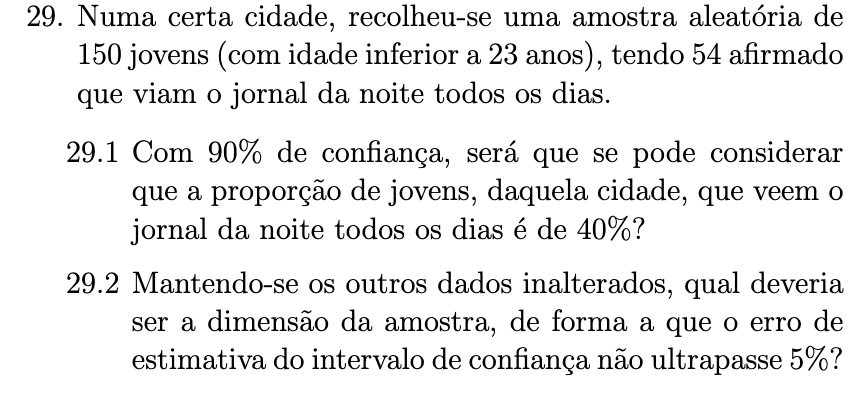

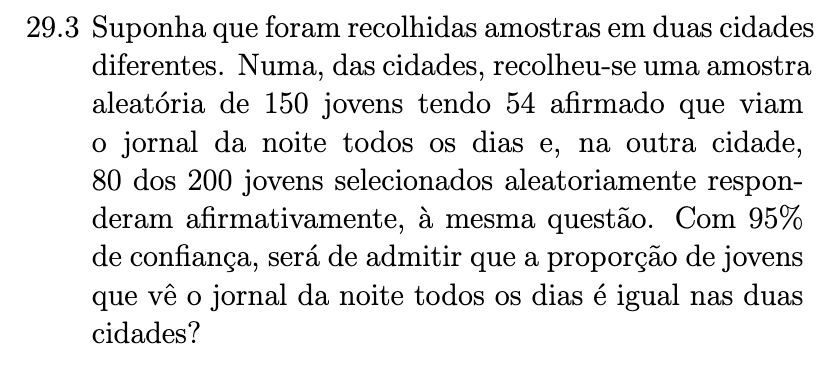

In [ ]:
import numpy as np
from scipy import stats